<a href="https://colab.research.google.com/github/AstrophyJimmy/1D_Harmonic_Oscillator_Solution_Simulation/blob/main/Numerical_Solution_of_the_Quantum_Harmonic_Oscillator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numerical Solution of the Quantum Harmonic Oscillator using Finite Difference Method


1D Problem reads: 
$$\big(-\tfrac{\hbar}{2m}\tfrac{\partial^2}{\partial x^2} + \tfrac{m\omega}{2}x^2  \big)\psi_n(x)=E_n\psi_n(x)$$

The problem is now on the Form: 
$$\Sigma_j \cal{H}_{ij}\psi_n(x_j)=E_n\psi_n(x_i)$$

Will approximate the second derivative using the Finite Difference Method: 

$$\tfrac{\partial^2\psi}{\partial x^2}\approx\tfrac{\psi(x_{i+1})+\psi(x_{i-1})-2\psi(x_{i})}{(\Delta x)^2}$$

Then the Kinetic Term of the potential is 


Then we'll be able to construct the matrix $\cal{H}$
$$\hat{\cal{H}}_{i,i} = V_i + \dfrac{1}{{\Delta x}^2} $$$$\hat{\cal{H}}_{i,i+1} =-\dfrac{1}{2{\Delta x}^2}$$$$\hat{\cal{H}}_{i,i-1} =-\dfrac{1}{2{\Delta x}^2}$$

Subjected to the Boundary Conditions $\psi(x_1)=\psi(x_N)=0$



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz
from scipy.linalg import eig
import random
from numpy import exp as e
from numpy import pi
from google.colab import files

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

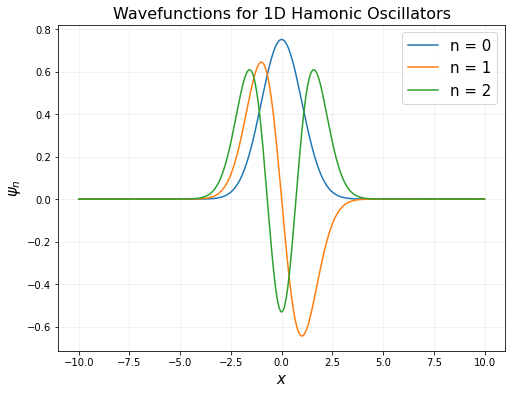

In [ ]:
l=10
N = 1001
x=np.linspace(l,-l,N)

def oscillator(x, omega=1, m=1):
  dx = x[0]-x[1]
  lx = x.size - 2 #Subjection to Boundary Conditions

  V = np.zeros(lx)
  for i in range(lx):
      V[i]=np.power(x[i+1],2)/2
  V = V*m*omega

  H = np.zeros([lx,lx])
  for i in range(lx):    
      H[i,i] = 1/(np.power(dx,2)*m)+ V[i]
      if lx-i-1: H[i,i+1] = -1/(2*m*np.power(dx,2))
      if i: H[i,i-1] = -1/(2*m*np.power(dx,2))

  E, psi = eig(H)
  idx = np.argsort(E)
  E = np.round(np.real(E[idx]),5)
  psi = psi[:, idx]

  psiNormalized = np.zeros_like(psi)
  for i in range(N-2):
    normFactor = trapz(psi[:,i]**2,dx=dx)
    psiNormalized[:,i]=  psi[:,i]/np.sqrt(normFactor)

  return E, psiNormalized

E, psiNormalized = oscillator(x)

fig = plt.figure(figsize=(8,6))
plt.title('Wavefunctions for 1D Hamonic Oscillators',fontsize=16)
plt.ylabel(r'$\psi_n$',fontsize=15)
plt.xlabel(r'$x$',fontsize=15)
for i in range(3):
  plt.plot(x,np.hstack([0,psiNormalized[:,i],0]),label = 'n = '+str(i))
plt.grid(alpha=0.2)
plt.legend(fontsize=15)
fig.show()
plt.savefig("Num Sol for QHO in 1D.png", dpi=300)
files.download("Num Sol for QHO in 1D.png")

In [ ]:
for i in range(10):
  print('E_'+str(i)+'=', E[i])

E_0= 0.49999
E_1= 1.49994
E_2= 2.49984
E_3= 3.49969
E_4= 4.49949
E_5= 5.49924
E_6= 6.49894
E_7= 7.49859
E_8= 8.49819
E_9= 9.49774
